<a href="https://colab.research.google.com/github/o-going/pdm01/blob/master/py-tensorflow/tf2_5_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
tf.random.set_seed(0)

2.3.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11493376/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- one random number
- 10 representative numbers

44590


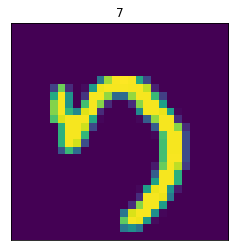

In [15]:
# Code here!
# display one random Image from the training set:

class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

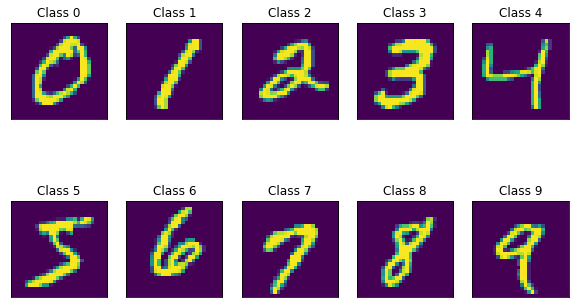

In [17]:
# 10 representative numbers
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import Conv2D, MaxPool2D

In [27]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

##**CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [58]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [59]:
c1f2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               802944    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_______________________________________________

In [60]:
32*14*14, 32*14*14*128 +128

(6272, 802944)

In [61]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1736 - accuracy: 0.9481
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.9813
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9858
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9894
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0267 - accuracy: 0.9915
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0205 - accuracy: 0.9929
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0159 - accuracy: 0.9949
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0136 - accuracy: 0.9952
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9953
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

In [62]:
c1f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0562 - accuracy: 0.9891


[0.05621226131916046, 0.9890999794006348]

## **CNN1 + FCN3**

In [63]:
c1f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),  
    Dropout(0.25),
    Dense(128, activation='relu'),  
    Dropout(0.25),  
    keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [64]:
c1f3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               1605888   
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)             

In [65]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1893 - accuracy: 0.9420
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0648 - accuracy: 0.9808
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0453 - accuracy: 0.9865
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0337 - accuracy: 0.9898
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0273 - accuracy: 0.9914
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0210 - accuracy: 0.9936
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0166 - accuracy: 0.9946
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9947
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.012

In [66]:
c1f3.evaluate(X_test, y_test, batch_size= 32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9878


[0.0721430703997612, 0.9878000020980835]

## **CNN2 + FCN2**

In [67]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [68]:
c2f2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)             

In [69]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1410 - accuracy: 0.9570
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0503 - accuracy: 0.9846
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0154 - accuracy: 0.9950
Epoch 8/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0117 - accuracy: 0.9961
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.010

In [70]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0355 - accuracy: 0.9932


[0.035477567464113235, 0.9932000041007996]

## **CNN2 + FCN3**

In [71]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),  
    Dropout(0.25), 
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
c2f3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               803072    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)             

In [73]:
c2f3.fit(X_train, y_train, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1605 - accuracy: 0.9507
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0561 - accuracy: 0.9835
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9882
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9908
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9922
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0209 - accuracy: 0.9940
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0193 - accuracy: 0.9940
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.013

In [74]:
c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9935


[0.043688613921403885, 0.9934999942779541]

# **[DIY] Hidden layer에 따른 정확도**

In [75]:
c1f2_score = c1f2.evaluate(X_test, y_test, batch_size = 32)
c1f3_score = c1f3.evaluate(X_test, y_test, batch_size = 32)
c2f2_score = c2f2.evaluate(X_test, y_test, batch_size = 32)
c2f3_score = c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9935


In [77]:
accuracy = [c1f2_score[1],c1f3_score[1],c2f2_score[1],c2f3_score[1]]
accuracy

[0.9890999794006348,
 0.9878000020980835,
 0.9932000041007996,
 0.9934999942779541]

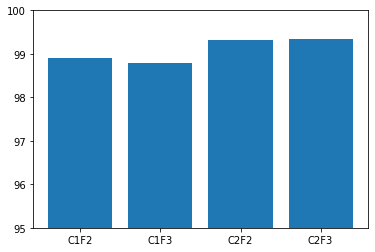

In [83]:
x = np.arange(4)
cnms = ['C1F2','C1F3','C2F2','C2F3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnms)
plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [84]:
c2f3.save('cnn_best.hdf5')

In [85]:
from keras.models import load_model

model = load_model('cnn_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9935


[0.043688613921403885, 0.9934999942779541]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [86]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.0359 - val_accuracy: 0.9923
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0432 - val_accuracy: 0.9915
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0477 - val_accuracy: 0.9928
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0432 - val_accuracy: 0.9916
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0338 - val_accuracy: 0.9937
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0429 - val_accuracy: 0.9925
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0480 - val_accuracy:

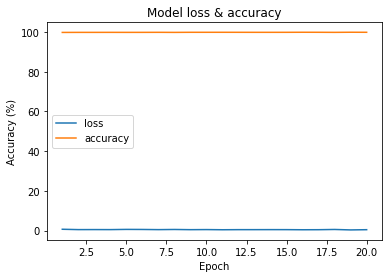

In [87]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [94]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

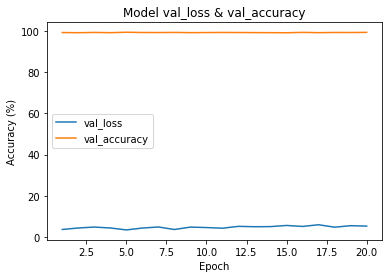

In [95]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

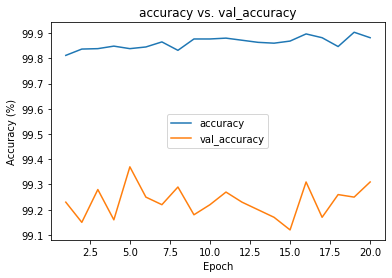

In [96]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [97]:
# Code here!
hist = c2f3.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.0382 - val_accuracy: 0.9927
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.0483 - val_accuracy: 0.9919
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0328 - val_accuracy: 0.9940
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0485 - val_accuracy: 0.9913
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0417 - val_accuracy: 0.9939
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.0462 - val_accuracy: 0.9925
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.0456 - val_accuracy:

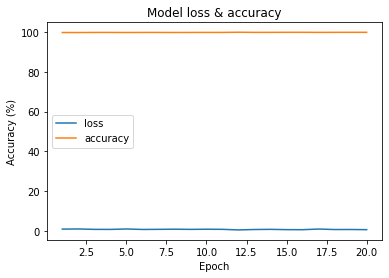

In [98]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [99]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

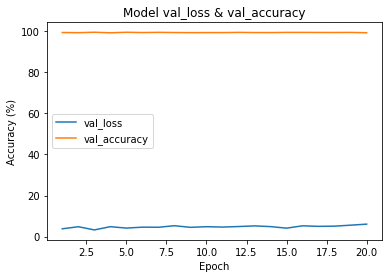

In [100]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

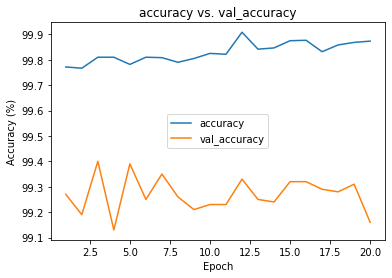

In [101]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')